# Utforskning av data

Tar inn de nye datasettene for å finne ut hva som er forskjellig/likt

#### Importerer biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Making plots look better
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

%config InlineBackend.figure_format = 'retina'

#### Henter ut ulike datasett

In [2]:
# TEK (13. Juli 2017 til 16. Desember 2018)
df_tek = pd.read_csv('vindkraft 130717-160218 TEK met.csv',sep =';', low_memory = False)
    #df_tek.info()
    
# Arome (1. Spetember til 16. Desember)
df_arome = pd.read_csv('vindkraft 130717-160218 arome korr winddir.csv',sep =';', low_memory = False)
    #df_tek.info()

## Fikser 2 timer frem med værdata

#### Arome

In [3]:
# Lager en ny dataframe
arome_2_hour_future_pred = df_arome.copy(deep=True)

# Forskyver to rader ved å fjerne de to første radene
arome_2_hour_future_pred.drop([0,1], inplace=True)

# Nullindekserer radene
arome_2_hour_future_pred.reset_index(inplace=True)

arome_2_hour_future_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237 entries, 0 to 5236
Columns: 490 entries, index to /arome_windvel_6573_1232
dtypes: float64(488), int64(1), object(1)
memory usage: 19.6+ MB


#### Tek (2 timer frem)

In [4]:
# Lager en ny dataframe
tek_2_hour_future_pred = df_tek.copy(deep=True)

# Forskyver to rader ved å fjerne de to første radene
tek_2_hour_future_pred.drop([0,1], inplace=True)

# Nullindekserer radene
tek_2_hour_future_pred.reset_index(inplace=True)

tek_2_hour_future_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237 entries, 0 to 5236
Columns: 310 entries, index to AnmeldingskorreksjonYtreVikna_ML_train
dtypes: float64(224), int64(86)
memory usage: 12.4 MB


#### Tilpasser eksisterende datasett

In [5]:
df_tek.drop([5237,5238], inplace= True)

In [6]:
df_arome.drop([5237,5238], inplace= True)

In [7]:
tek_2_hour_future_pred['Target'] = tek_2_hour_future_pred['BESS-Bessakerfj.-GS-T4015A3 -0104']

## 'data_bessaker_simple.csv'

In [8]:
data_simple = pd.concat([

     
    # Sum nåværende produksjon 
    df_tek['BESS-Bessakerfj.-GS-T4015A3 -0104'],

    

    # Værstasjoner og tilhørende punkter
    
    # VÆRNES (Koordinater: 63.460, 10.931)
    df_tek['DNMI_69100...........T0015A3-0120'],
    df_arome['/arome_windvel_6347_1092'],

    # ØRLAND III (Koordinater: 63.705, 9.611)
    df_tek['DNMI_71550...........T0015A3-0120'],
    df_arome['/arome_windvel_6372_0961'],
    
        
    # HALTEN FYR ( Kordinater: 64.173, 9.405 )
    df_tek['DNMI_71850...........T0015A3-0120'],
    df_arome['/arome_windvel_6413_0933'],
    
    # BUHOLMRÅSA FYR (kordinater: 64.401, 10.455)
    df_tek['DNMI_71990...........T0015A3-0120'],
    df_arome['/arome_windvel_6440_1047'],
        
    
    # NAMSOS LUFTHAVN (Koordinater: 64.471, 11.571)
    df_tek['DNMI_72580...........T0015A3-0120'],
    df_arome['/arome_windvel_6447_1156'],



    #Storm værmelding i sentrum av park
    tek_2_hour_future_pred['STORM-Bess-Vindretn-25km'],
    tek_2_hour_future_pred['STORM-Bess-Vindhast-25km'],
    
    
    
                
    
    # Target value
    tek_2_hour_future_pred['Target']
    
    ], 
    axis = 1)

## 'data_bessaker_advanced.csv'

Lager et mer avansert datasett

In [9]:
data_advanced = pd.concat([

    # Enkeltstående turbiner (produksjon + status)
    df_tek['BESS-Bessakerfj.-G1-T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G1.AVL'],
    
    df_tek['BESS-Bessakerfj.-G2-T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G2.AVL'],
    
    df_tek['BESS-Bessakerfj.-G3-T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G3.AVL'],
    
    df_tek['BESS-Bessakerfj.-G4-T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G4.AVL'],
    
    df_tek['BESS-Bessakerfj.-G5-T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G5.AVL'],
    
    df_tek['BESS-Bessakerfj.-G6-T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G6.AVL'],
    
    df_tek['BESS-Bessakerfj.-G7-T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G7.AVL'],
    
    df_tek['BESS-Bessakerfj.-G8-T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G1.AVL'],
    
    df_tek['BESS-Bessakerfj.-G9-T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G1.AVL'],
    
    df_tek['BESS-Bessakerfj.-G10T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G1.AVL'],
    
    df_tek['BESS-Bessakerfj.-G11T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G1.AVL'],
    
    df_tek['BESS-Bessakerfj.-G12T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G1.AVL'],
    
    df_tek['BESS-Bessakerfj.-G13T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G1.AVL'],
    
    df_tek['BESS-Bessakerfj.-G14T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G1.AVL'],
    
    df_tek['BESS-Bessakerfj.-G15T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G1.AVL'],
    
    df_tek['BESS-Bessakerfj.-G16T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G1.AVL'],
    
    df_tek['BESS-Bessakerfj.-G17T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G1.AVL'],
    
    df_tek['BESS-Bessakerfj.-G18T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G1.AVL'],
    
    df_tek['BESS-Bessakerfj.-G19T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G1.AVL'],
    
    df_tek['BESS-Bessakerfj.-G20T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G2.AVL'],
    
    df_tek['BESS-Bessakerfj.-G21T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G2.AVL'],
    
    df_tek['BESS-Bessakerfj.-G22T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G2.AVL'],
    
    df_tek['BESS-Bessakerfj.-G23T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G2.AVL'],
    
    df_tek['BESS-Bessakerfj.-G24T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G2.AVL'],
    
    df_tek['BESS-Bessakerfj.-G25T4015A3 -0104'],
    df_tek['RRS.S2464.Gunit.M1-7 G2.AVL'],
    
    
    # Sum
    df_tek['BESS-Bessakerfj.-GS-T4015A3 -0104'],

    

    # Værstasjoner og tilhørende aromepunkter
    
    # VÆRNES (Koordinater: 63.460, 10.931)
    df_tek['DNMI_69100...........T0015A3-0120'],
    df_arome['/arome_windvel_6347_1092'],

    # ØRLAND III (Koordinater: 63.705, 9.611)
    df_tek['DNMI_71550...........T0015A3-0120'],
    df_arome['/arome_windvel_6372_0961'],
    
        
    # HALTEN FYR ( Kordinater: 64.173, 9.405 )
    df_tek['DNMI_71850...........T0015A3-0120'],
    df_arome['/arome_windvel_6413_0933'],
    
    # BUHOLMRÅSA FYR (kordinater: 64.401, 10.455)
    df_tek['DNMI_71990...........T0015A3-0120'],
    df_arome['/arome_windvel_6440_1047'],
        
    
    # NAMSOS LUFTHAVN (Koordinater: 64.471, 11.571)
    df_tek['DNMI_72580...........T0015A3-0120'],
    df_arome['/arome_windvel_6447_1156'],



    #Storm værmelding i sentrum av park
    tek_2_hour_future_pred['STORM-Bess-Vindretn-25km'],
    tek_2_hour_future_pred['STORM-Bess-Vindhast-25km'],
    
    # Arome værmelding nær sentrum av parken
    
    # Punkt 1
    arome_2_hour_future_pred['/arome_windvel_6422_1040'],
    arome_2_hour_future_pred['/arome_airtemp_6422_1040'],
    
    # Punkt 2
    arome_2_hour_future_pred['/arome_windvel_6421_1035'],
    arome_2_hour_future_pred['/arome_airtemp_6421_1035'],
    
    
    # Sum
    df_tek['BESS-Bessakerfj.-GS-T4015A3 -0104'],            
    
    # Target value
    tek_2_hour_future_pred['Target']
    
    ], 
    axis = 1)

# Produksjonen på enkeltmøllebasis

In [16]:
data_comp = pd.concat([

    # Enkeltstående turbiner (produksjon + status)
    df_tek['BESS-Bessakerfj.-G1-T4015A3 -0104'],
  
    
    df_tek['BESS-Bessakerfj.-G2-T4015A3 -0104'],
    
    
    df_tek['BESS-Bessakerfj.-G3-T4015A3 -0104'],
    
    
    df_tek['BESS-Bessakerfj.-G4-T4015A3 -0104'],
 
    
    df_tek['BESS-Bessakerfj.-G5-T4015A3 -0104'],
 
    df_tek['BESS-Bessakerfj.-G6-T4015A3 -0104'],

    
    df_tek['BESS-Bessakerfj.-G7-T4015A3 -0104'],

    
    df_tek['BESS-Bessakerfj.-G8-T4015A3 -0104'],
  
    
    df_tek['BESS-Bessakerfj.-G9-T4015A3 -0104'],
       
    df_tek['BESS-Bessakerfj.-G10T4015A3 -0104'],
    
        
    df_tek['BESS-Bessakerfj.-G11T4015A3 -0104'],
  
    
    df_tek['BESS-Bessakerfj.-G12T4015A3 -0104'],
  
    
    df_tek['BESS-Bessakerfj.-G13T4015A3 -0104'],

    
    df_tek['BESS-Bessakerfj.-G14T4015A3 -0104'],
  
    
    df_tek['BESS-Bessakerfj.-G15T4015A3 -0104'],
    
    
    df_tek['BESS-Bessakerfj.-G16T4015A3 -0104'],

    
    df_tek['BESS-Bessakerfj.-G17T4015A3 -0104'],
   
    
    df_tek['BESS-Bessakerfj.-G18T4015A3 -0104'],
  
    
    df_tek['BESS-Bessakerfj.-G19T4015A3 -0104'],
  
    df_tek['BESS-Bessakerfj.-G20T4015A3 -0104'],
    
    df_tek['BESS-Bessakerfj.-G21T4015A3 -0104'],

    df_tek['BESS-Bessakerfj.-G22T4015A3 -0104'],

    
    df_tek['BESS-Bessakerfj.-G23T4015A3 -0104'],
    
    
    df_tek['BESS-Bessakerfj.-G24T4015A3 -0104'],
   
    
    df_tek['BESS-Bessakerfj.-G25T4015A3 -0104'],
    
        ], 
    axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002827570B780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028276492748>]], dtype=object)

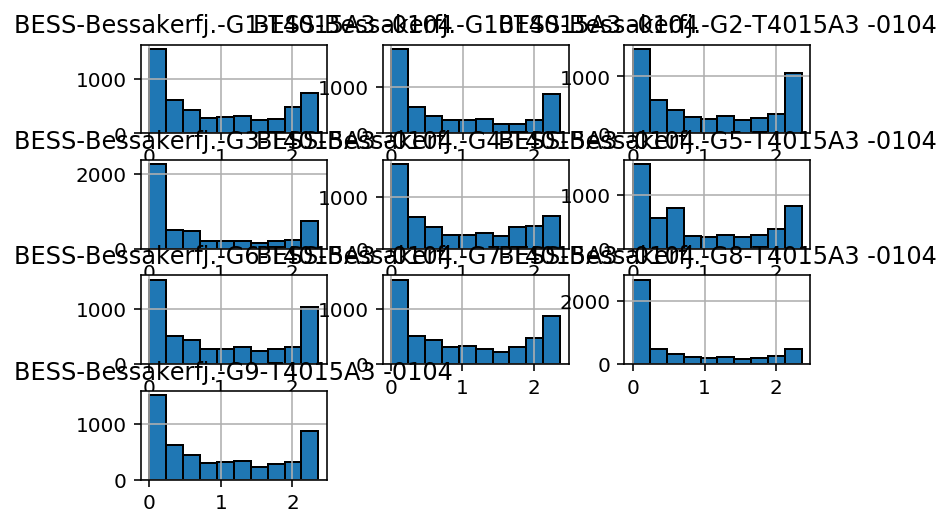

In [11]:
data_comp.hist()

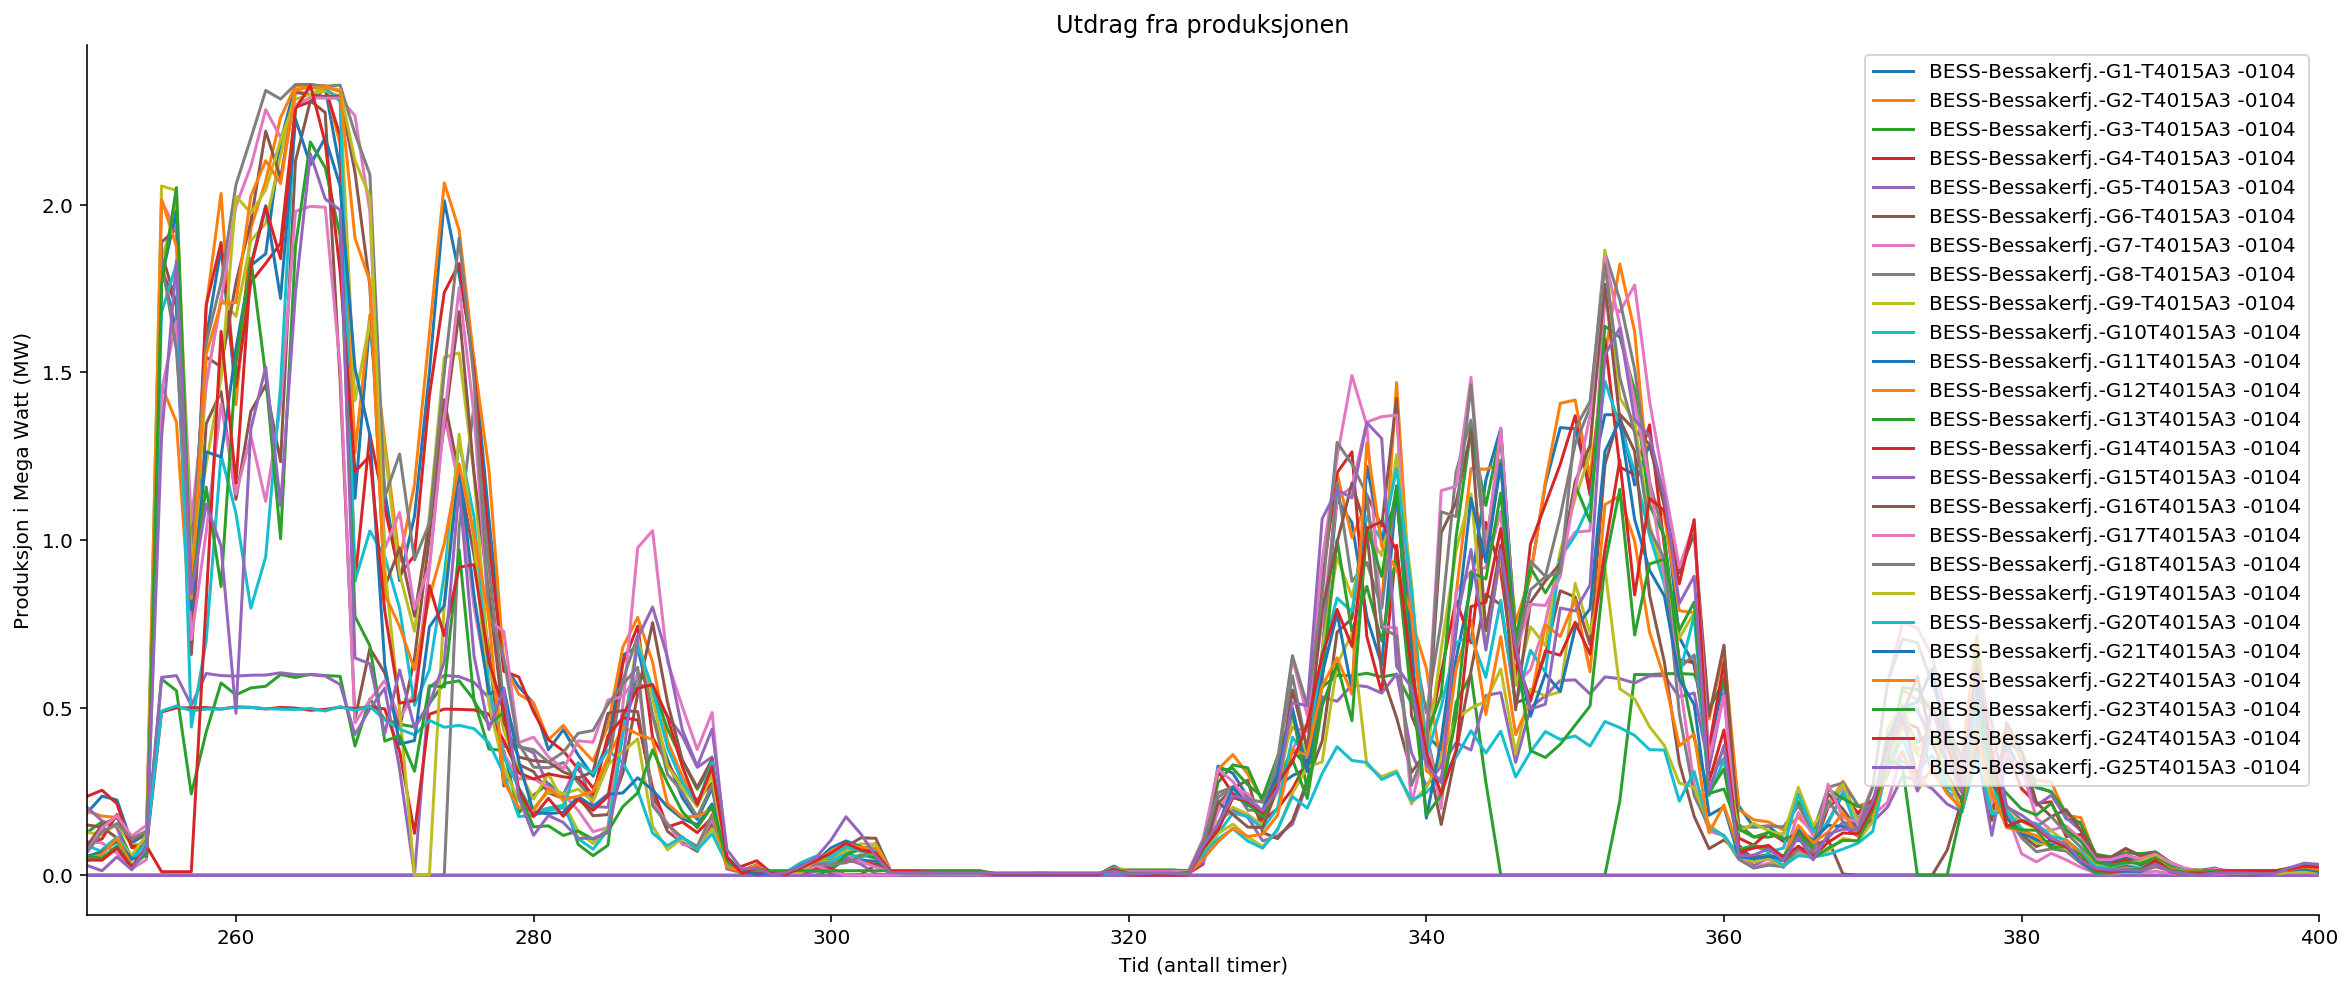

In [83]:
# Justere tidslinjen på plottet
start = 250
slutt = 400

ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G1-T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G2-T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G3-T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G4-T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G5-T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G6-T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G7-T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G8-T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G9-T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G10T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G11T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G12T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G13T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G14T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G15T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G16T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G17T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G18T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G19T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G20T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G21T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G22T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G23T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G24T4015A3 -0104'].plot(figsize=(20,8))
ax = data_comp.loc[start:slutt,'BESS-Bessakerfj.-G25T4015A3 -0104'].plot(figsize=(20,8))


 
plt.xlabel('Tid (antall timer)')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Utdrag fra produksjonen')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
fig.savefig('all_turbines5.png')

In [19]:
eirik = df_tek.filter(regex='BESS-Bessakerfj.*T4015A3 -0104')

In [20]:
eirik.head()

BESS-Bessakerfj.-G1-T4015A3 -0104  BESS-Bessakerfj.-G2-T4015A3 -0104  \
0                           1.429567                           1.530417   
1                           1.428450                           1.675450   
2                           1.601617                           1.681950   
3                           1.761867                           1.763900   
4                           1.767500                           1.919383   

   BESS-Bessakerfj.-G3-T4015A3 -0104  BESS-Bessakerfj.-G4-T4015A3 -0104  \
0                           0.587017                           1.393733   
1                           0.596433                           1.440050   
2                           0.598683                           1.802783   
3                           0.593400                           1.757700   
4                           0.598250                           1.764233   

   BESS-Bessakerfj.-G5-T4015A3 -0104  BESS-Bessakerfj.-G6-T4015A3 -0104  \
0                           0.593583                           1.102417   
1                           0.600450                           1.359833   
2                           0.595733                           1.364850   
3                           0.597167                           1.574300   
4                           0.596600                           1.677883   

   BESS-Bessakerfj.-G7-T4015A3 -0104  BESS-Bessakerfj.-G8-T4015A3 -0104  \
0                           1.174733                                0.0   
1                           1.120100                                0.0   
2                           1.181333                                0.0   
3                           1.651350                                0.0   
4                           1.525283                                0.0   

   BESS-Bessakerfj.-G9-T4015A3 -0104  BESS-Bessakerfj.-G10T4015A3 -0104  \
0                           1.353083                           1.268667   
1                           1.413100                           1.313600   
2                           1.446283                           1.291600   
3                           1.911850                           1.615850   
4                           1.687333                           1.499283   

                 ...                  BESS-Bessakerfj.-G17T4015A3 -0104  \
0                ...                                           0.441650   
1                ...                                           0.525133   
2                ...                                           0.565550   
3                ...                                           0.863833   
4                ...                                           0.705150   

   BESS-Bessakerfj.-G18T4015A3 -0104  BESS-Bessakerfj.-G19T4015A3 -0104  \
0                           0.808283                           0.858967   
1                           0.888483                           1.070633   
2                           0.598817                           0.649383   
3                           1.251117                           1.208617   
4                           1.140200                           1.228267   

   BESS-Bessakerfj.-G20T4015A3 -0104  BESS-Bessakerfj.-G21T4015A3 -0104  \
0                           0.875583                           0.725617   
1                           0.846767                           0.853800   
2                           0.946217                           0.555800   
3                           1.392100                           0.904017   
4                           1.050183                           1.028817   

   BESS-Bessakerfj.-G22T4015A3 -0104  BESS-Bessakerfj.-G23T4015A3 -0104  \
0                           1.482767                           1.418333   
1                           1.695733                           1.664383   
2                           1.497450                           1.502817   
3                           1.777700                           1.853467   
4                   

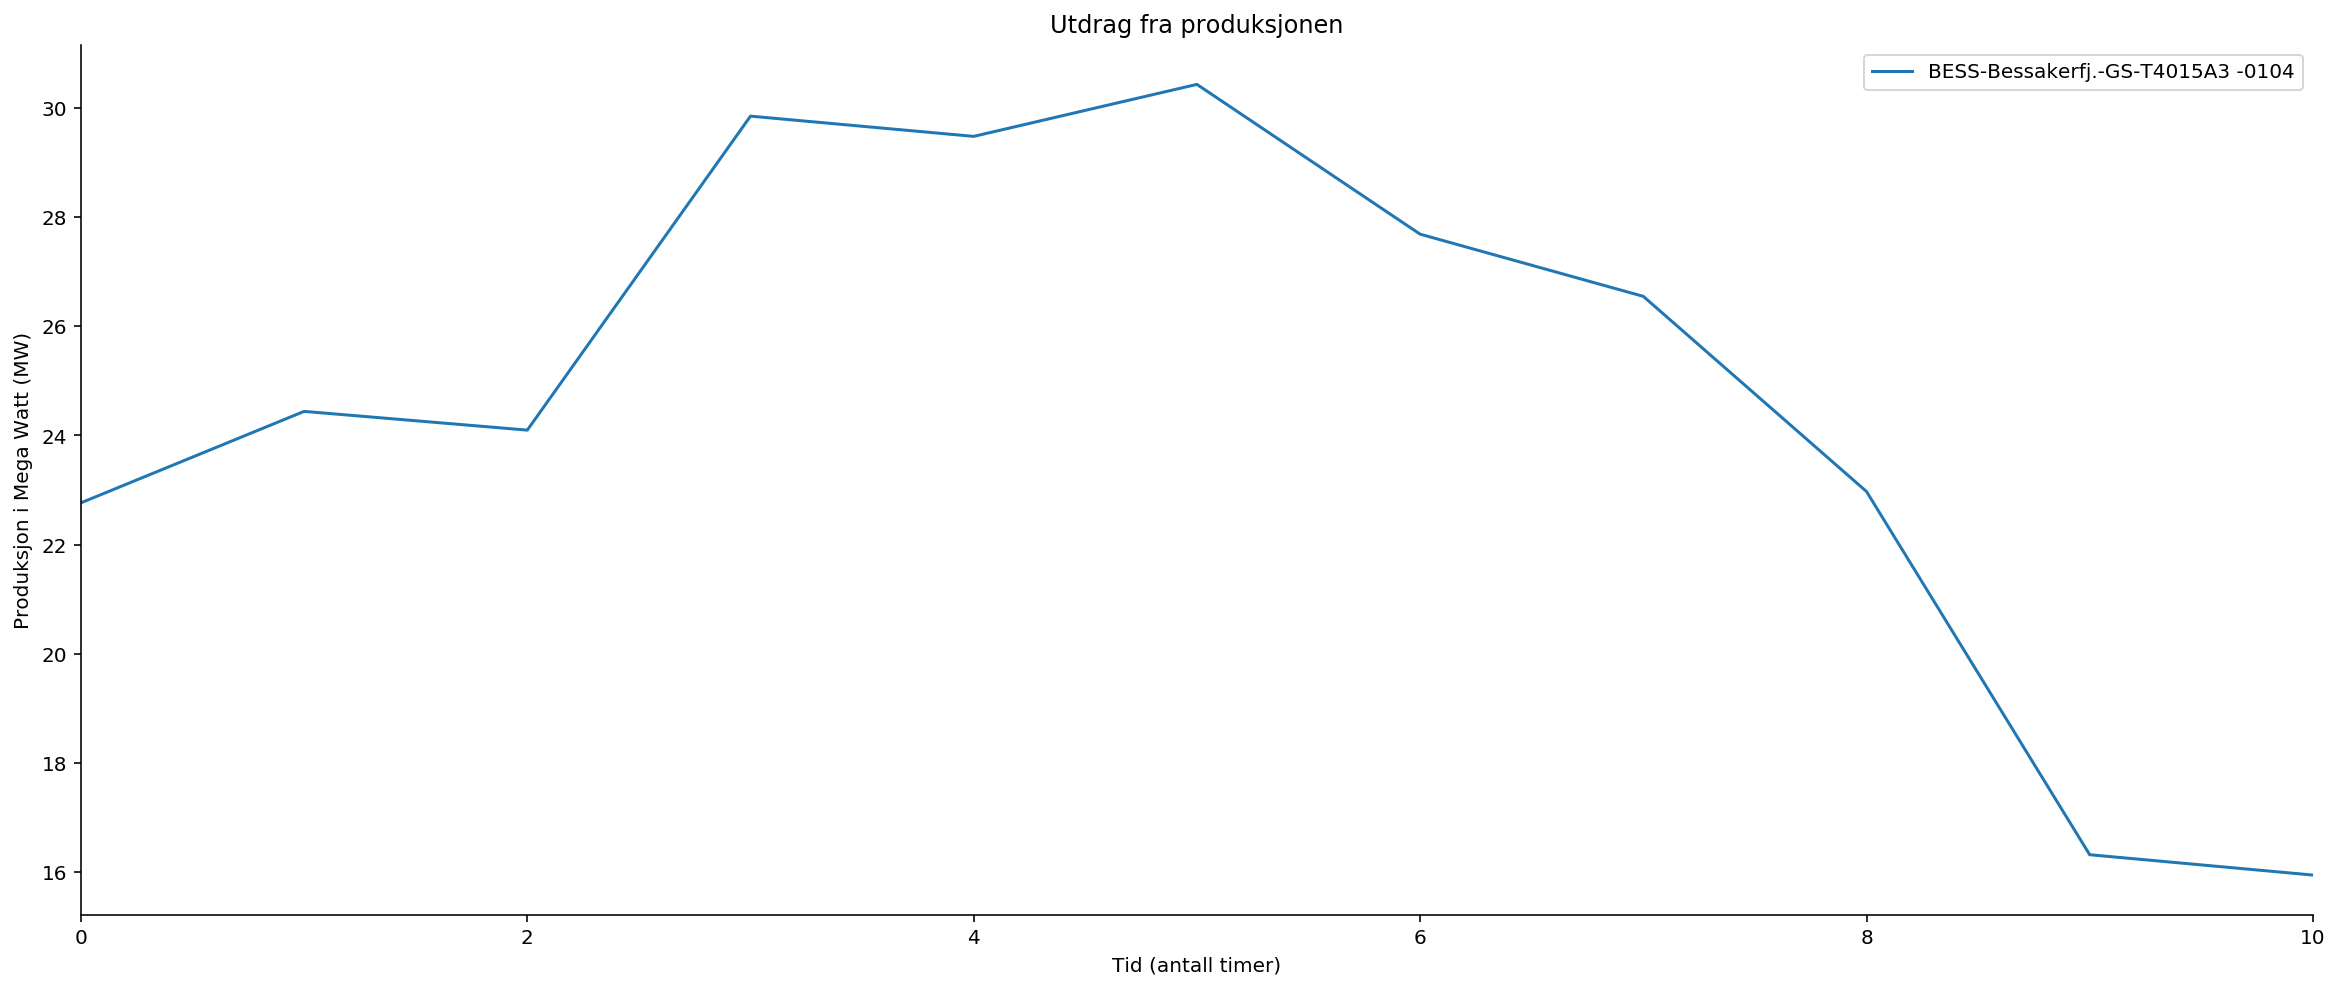

In [38]:
# Justere tidslinjen på plottet
start = 0
slutt = 10

ax = df_tek.loc[start:slutt,'BESS-Bessakerfj.-GS-T4015A3 -0104'].plot(figsize=(20,8))


 
plt.xlabel('Tid (antall timer)')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Utdrag fra produksjonen')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
fig.savefig('all_turbines6.png')

In [45]:
df_tek.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5237 entries, 0 to 5236
Columns: 309 entries, Unnamed: 0 to AnmeldingskorreksjonYtreVikna_ML_train
dtypes: float64(224), int64(85)
memory usage: 12.5 MB


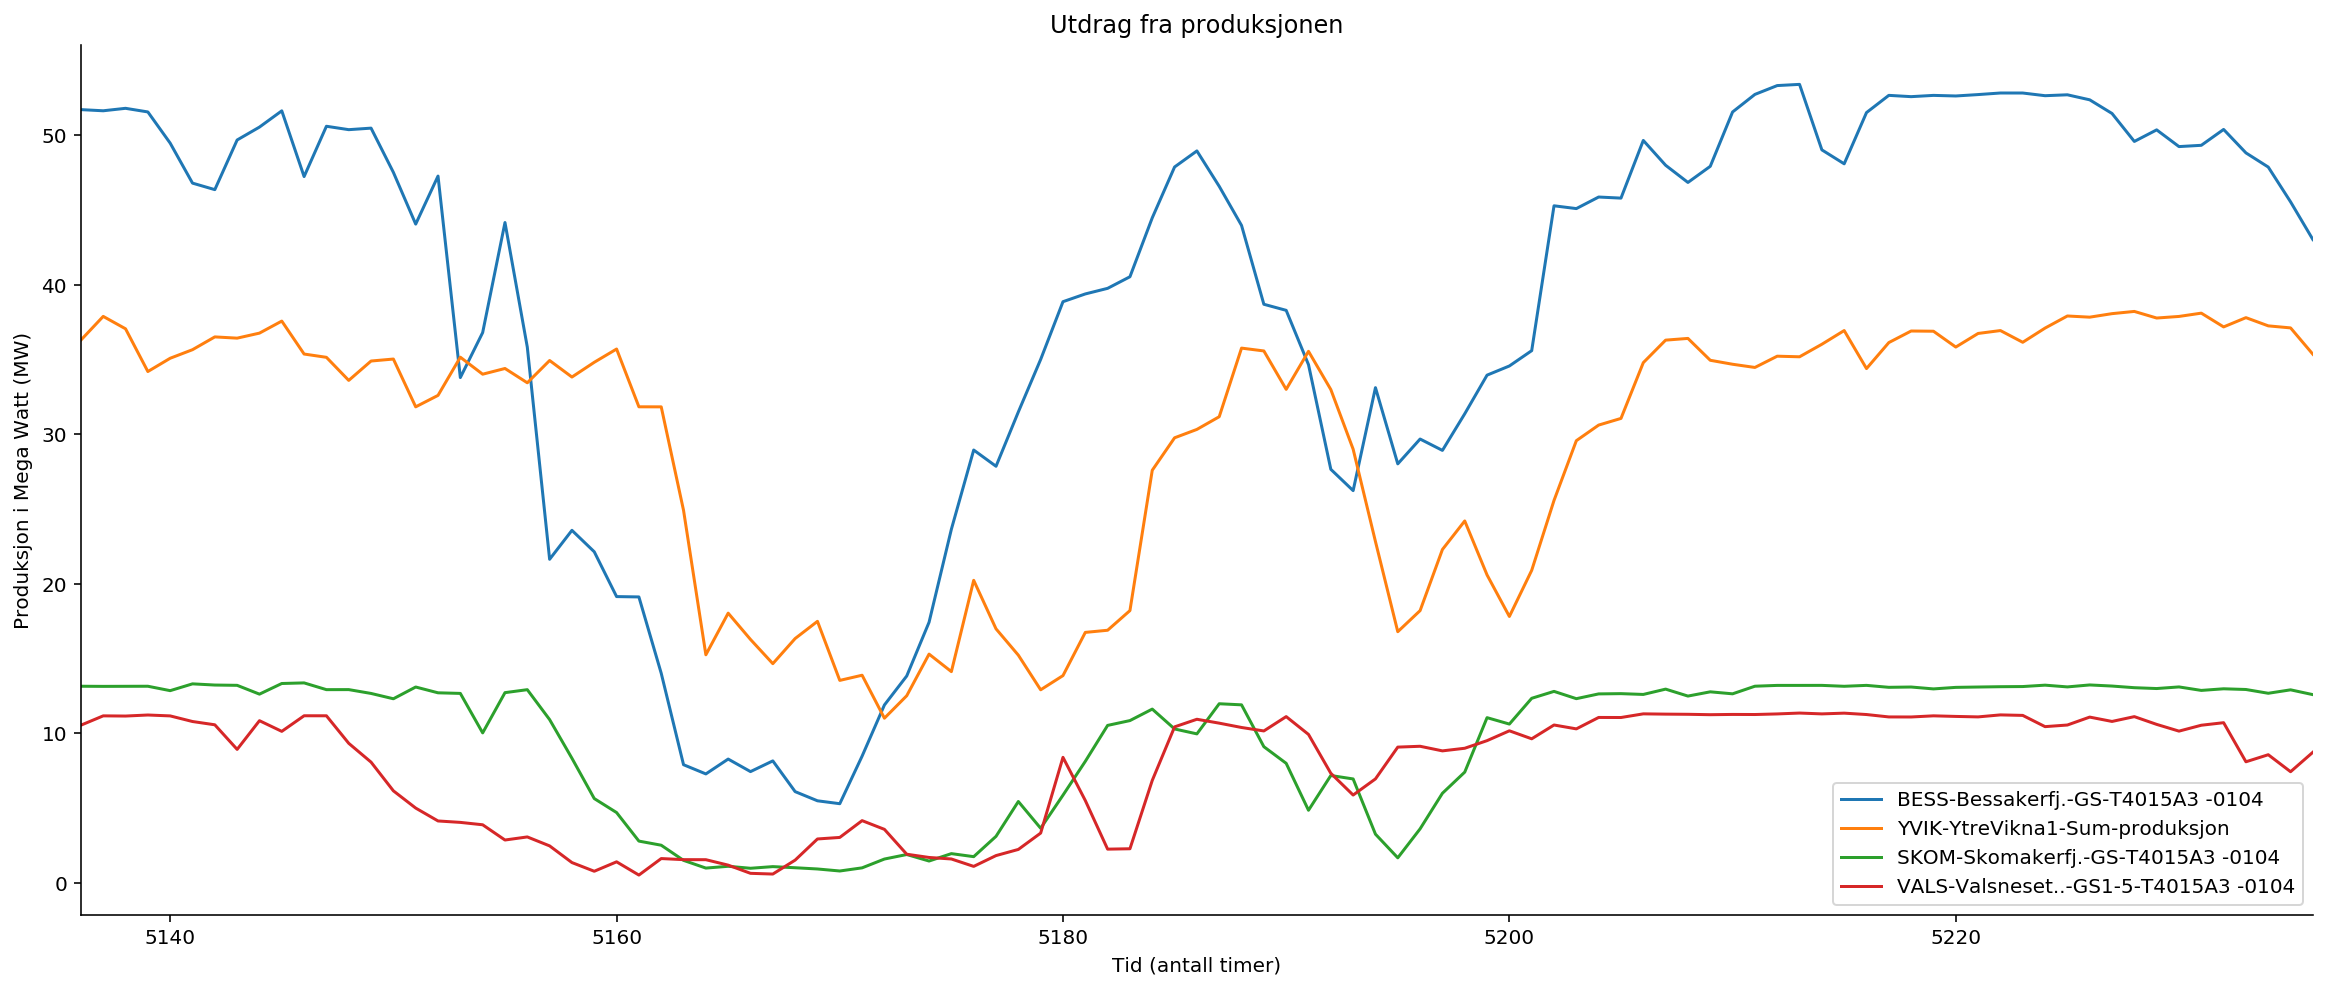

In [46]:
# Justere tidslinjen på plottet
start = 5236-100
slutt = 5236

ax = df_tek.loc[start:slutt,'BESS-Bessakerfj.-GS-T4015A3 -0104'].plot(figsize=(20,8))
ax = df_tek.loc[start:slutt,'YVIK-YtreVikna1-Sum-produksjon'].plot(figsize=(20,8))
ax = df_tek.loc[start:slutt,'SKOM-Skomakerfj.-GS-T4015A3 -0104'].plot(figsize=(20,8))
ax = df_tek.loc[start:slutt,'VALS-Valsneset..-GS1-5-T4015A3 -0104'].plot(figsize=(20,8))



 
plt.xlabel('Tid (antall timer)')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Utdrag fra produksjonen')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
fig.savefig('all_turbines7.png')

In [47]:
data_parks = pd.concat([

    # Enkeltstående turbiner (produksjon + status)
    df_tek['BESS-Bessakerfj.-G1-T4015A3 -0104'],
    df_tek['YVIK-YtreVikna1-Sum-produksjon'],
    df_tek['SKOM-Skomakerfj.-GS-T4015A3 -0104'],
    df_tek['VALS-Valsneset..-GS1-5-T4015A3 -0104'],
  

        ], 
    axis = 1)

In [51]:
data_parks['Bessaker'] = df_tek['BESS-Bessakerfj.-GS-T4015A3 -0104']/25
data_parks['Ytre_Vikna'] = df_tek['YVIK-YtreVikna1-Sum-produksjon']/17
data_parks['Valsneset'] = df_tek['VALS-Valsneset..-GS1-5-T4015A3 -0104']/5
data_parks['Skomakerfjellet'] = df_tek['SKOM-Skomakerfj.-GS-T4015A3 -0104']/4

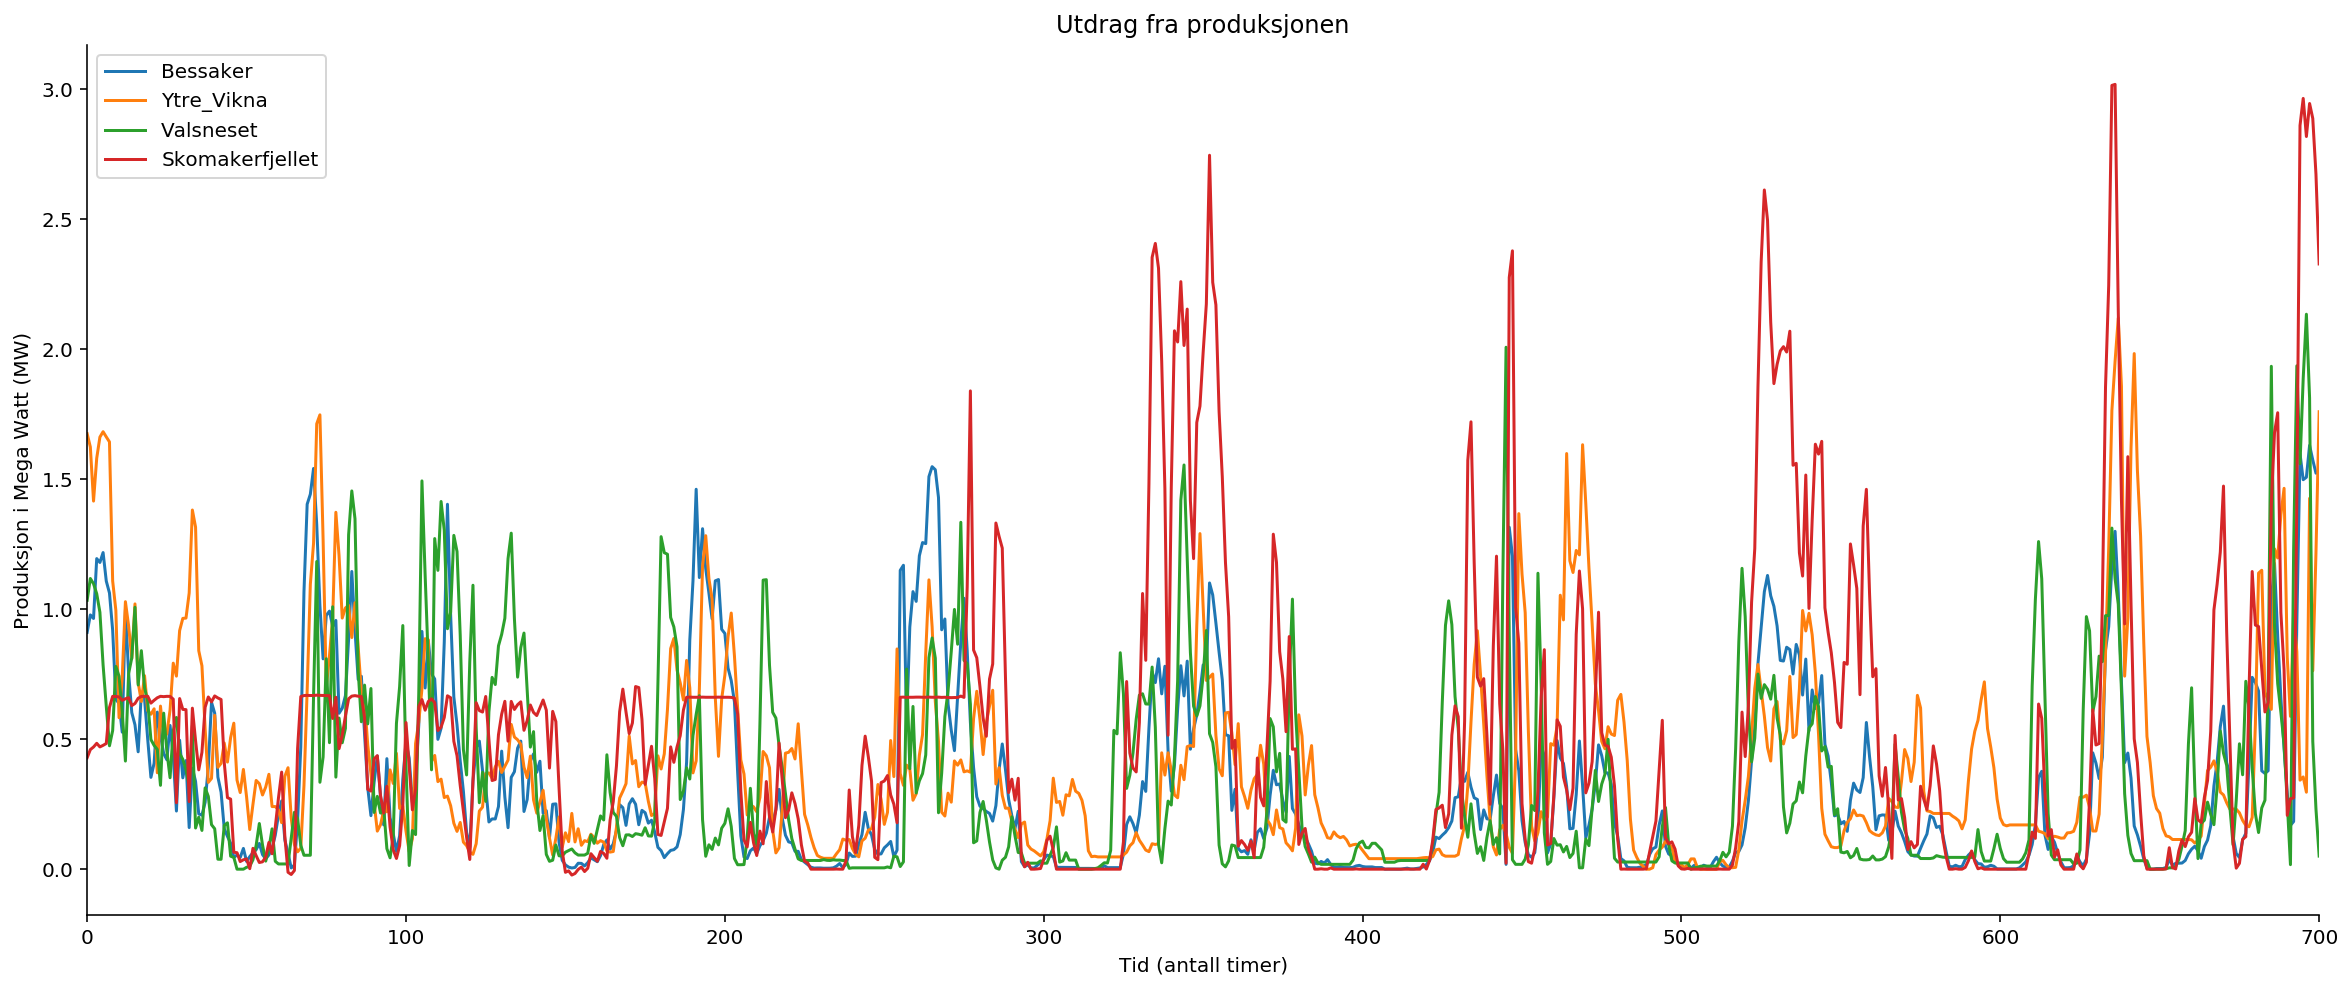

In [70]:
# Justere tidslinjen på plottet
start = 0
slutt = 700

ax = data_parks.loc[start:slutt,'Bessaker'].plot(figsize=(20,8))
ax = data_parks.loc[start:slutt,'Ytre_Vikna'].plot(figsize=(20,8))
ax = data_parks.loc[start:slutt,'Valsneset'].plot(figsize=(20,8))
ax = data_parks.loc[start:slutt,'Skomakerfjellet'].plot(figsize=(20,8))


 
plt.xlabel('Tid (antall timer)')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Utdrag fra produksjonen')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
fig.savefig('all_turbines10.png')

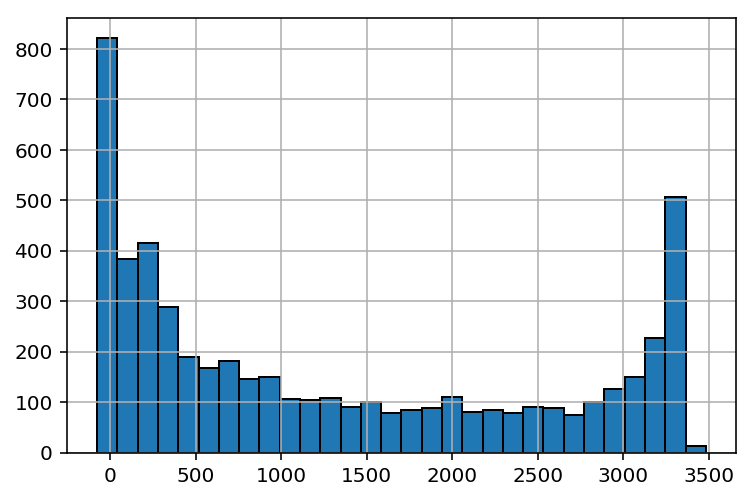

In [57]:
df_tek['SKOM-Skomakerfj.-G2-T4015A3 -0104'].hist(bins=30)

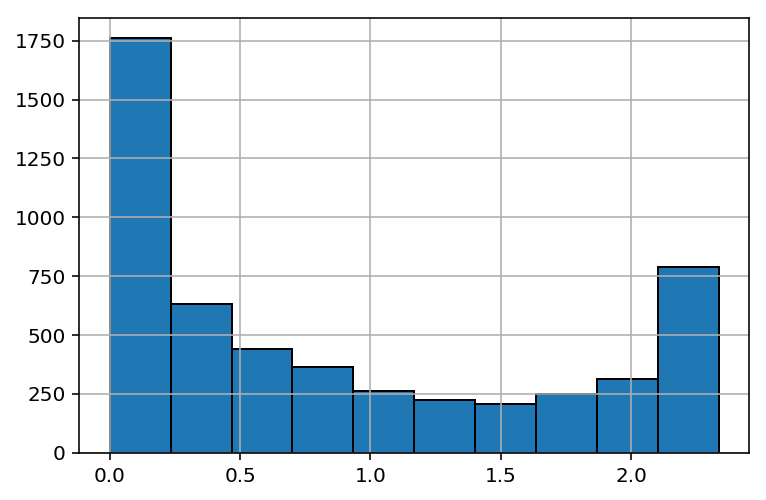

In [60]:
df_tek['VALS-Valsneset..-G2-T4015A3 -0104'].hist()

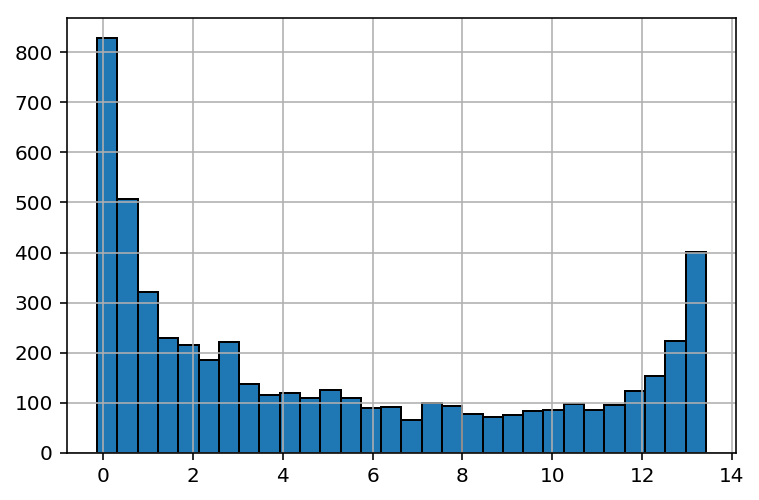

In [62]:
df_tek['SKOM-Skomakerfj.-GS-T4015A3 -0104'].hist(bins=30)

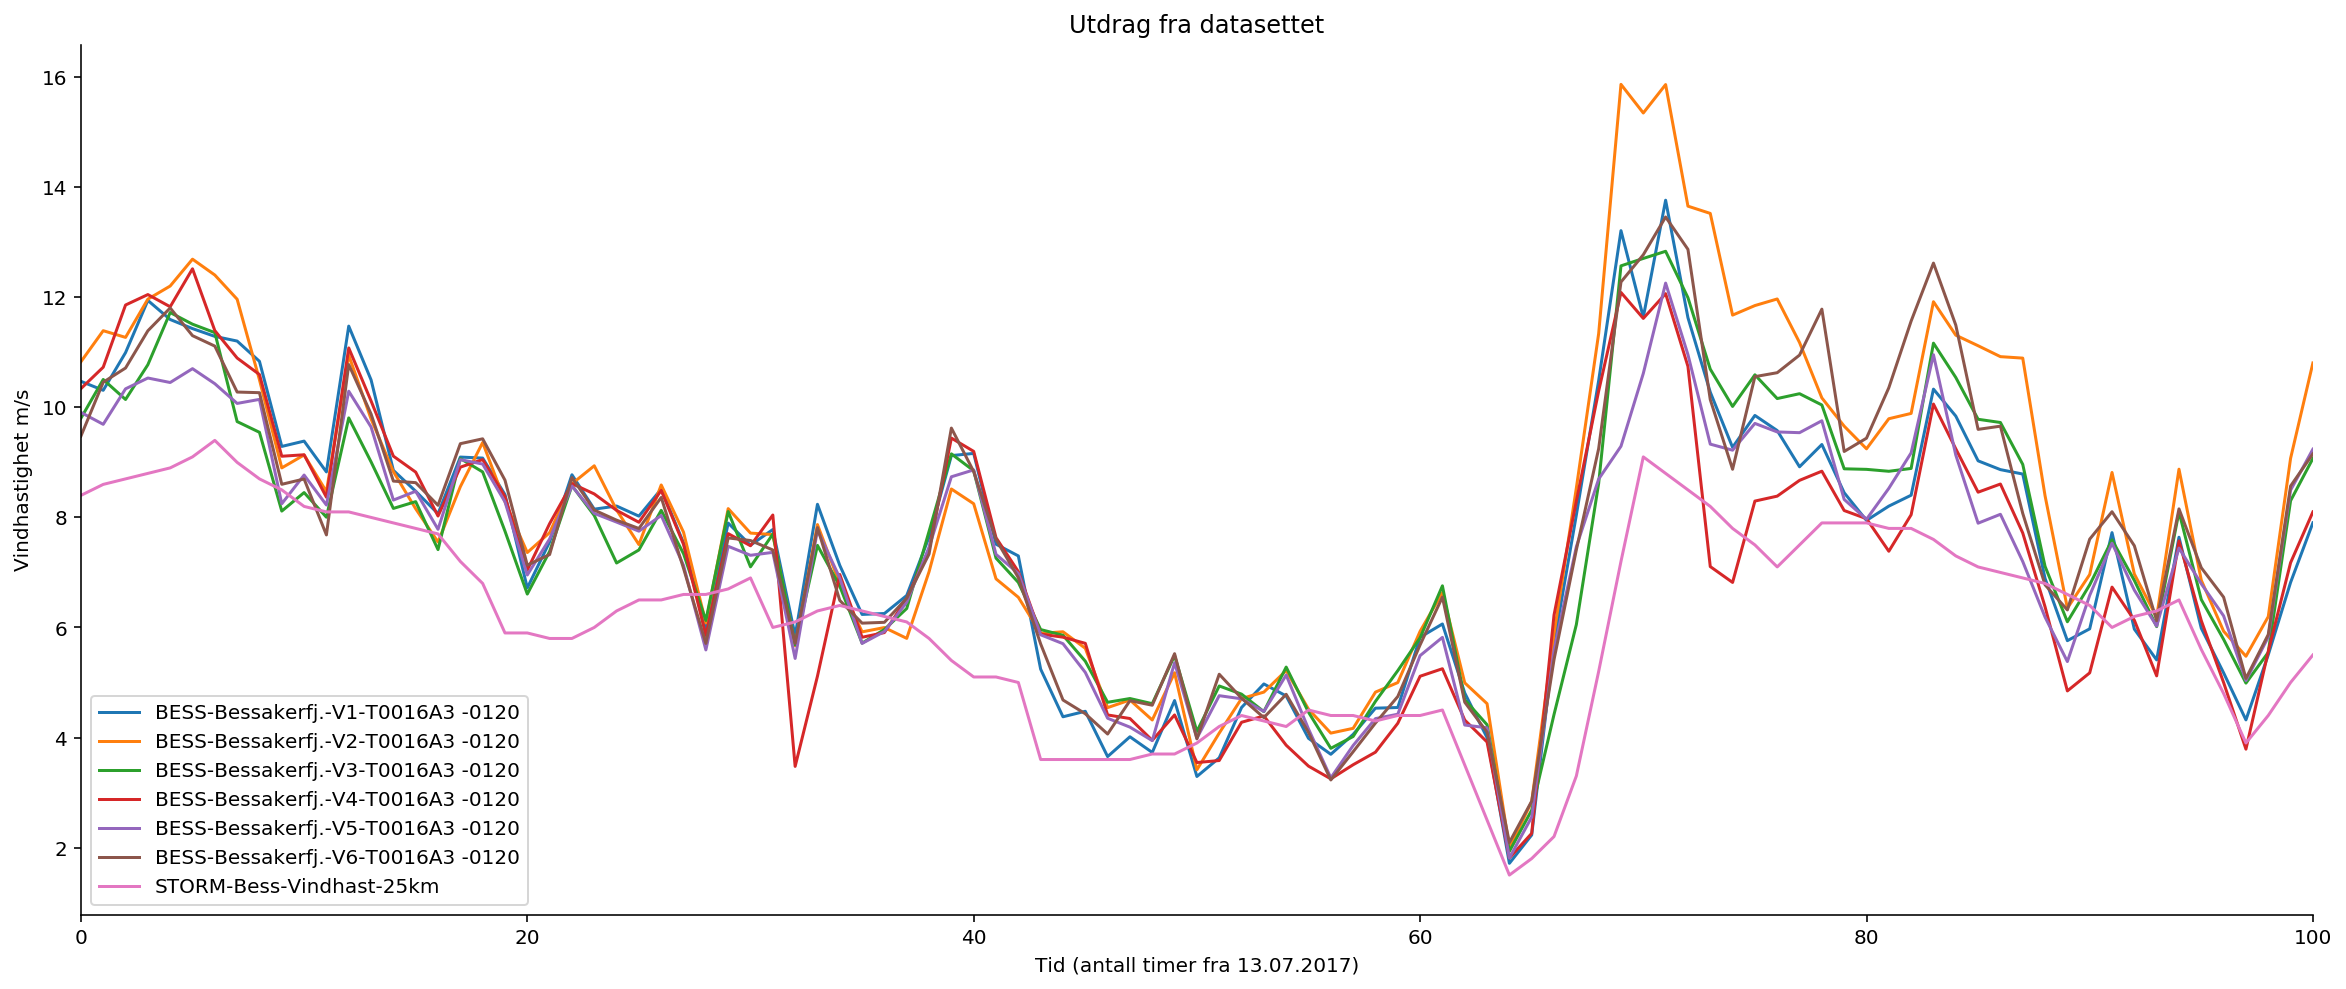

In [88]:
# Justere tidslinjen på plottet
start = 0
slutt = 100

ax = df_tek.loc[start:slutt,'BESS-Bessakerfj.-V1-T0016A3 -0120'].plot(figsize=(20,8))
ax = df_tek.loc[start:slutt,'BESS-Bessakerfj.-V2-T0016A3 -0120'].plot(figsize=(20,8))
ax = df_tek.loc[start:slutt,'BESS-Bessakerfj.-V3-T0016A3 -0120'].plot(figsize=(20,8))
ax = df_tek.loc[start:slutt,'BESS-Bessakerfj.-V4-T0016A3 -0120'].plot(figsize=(20,8))
ax = df_tek.loc[start:slutt,'BESS-Bessakerfj.-V5-T0016A3 -0120'].plot(figsize=(20,8))
ax = df_tek.loc[start:slutt,'BESS-Bessakerfj.-V6-T0016A3 -0120'].plot(figsize=(20,8))

ax = df_tek.loc[start:slutt,'STORM-Bess-Vindhast-25km'].plot(figsize=(20,8))



 
plt.xlabel('Tid (antall timer fra 13.07.2017)')
plt.ylabel('Vindhastighet m/s')
plt.title('Utdrag fra datasettet')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
fig.savefig('sammenligning naselle.png')

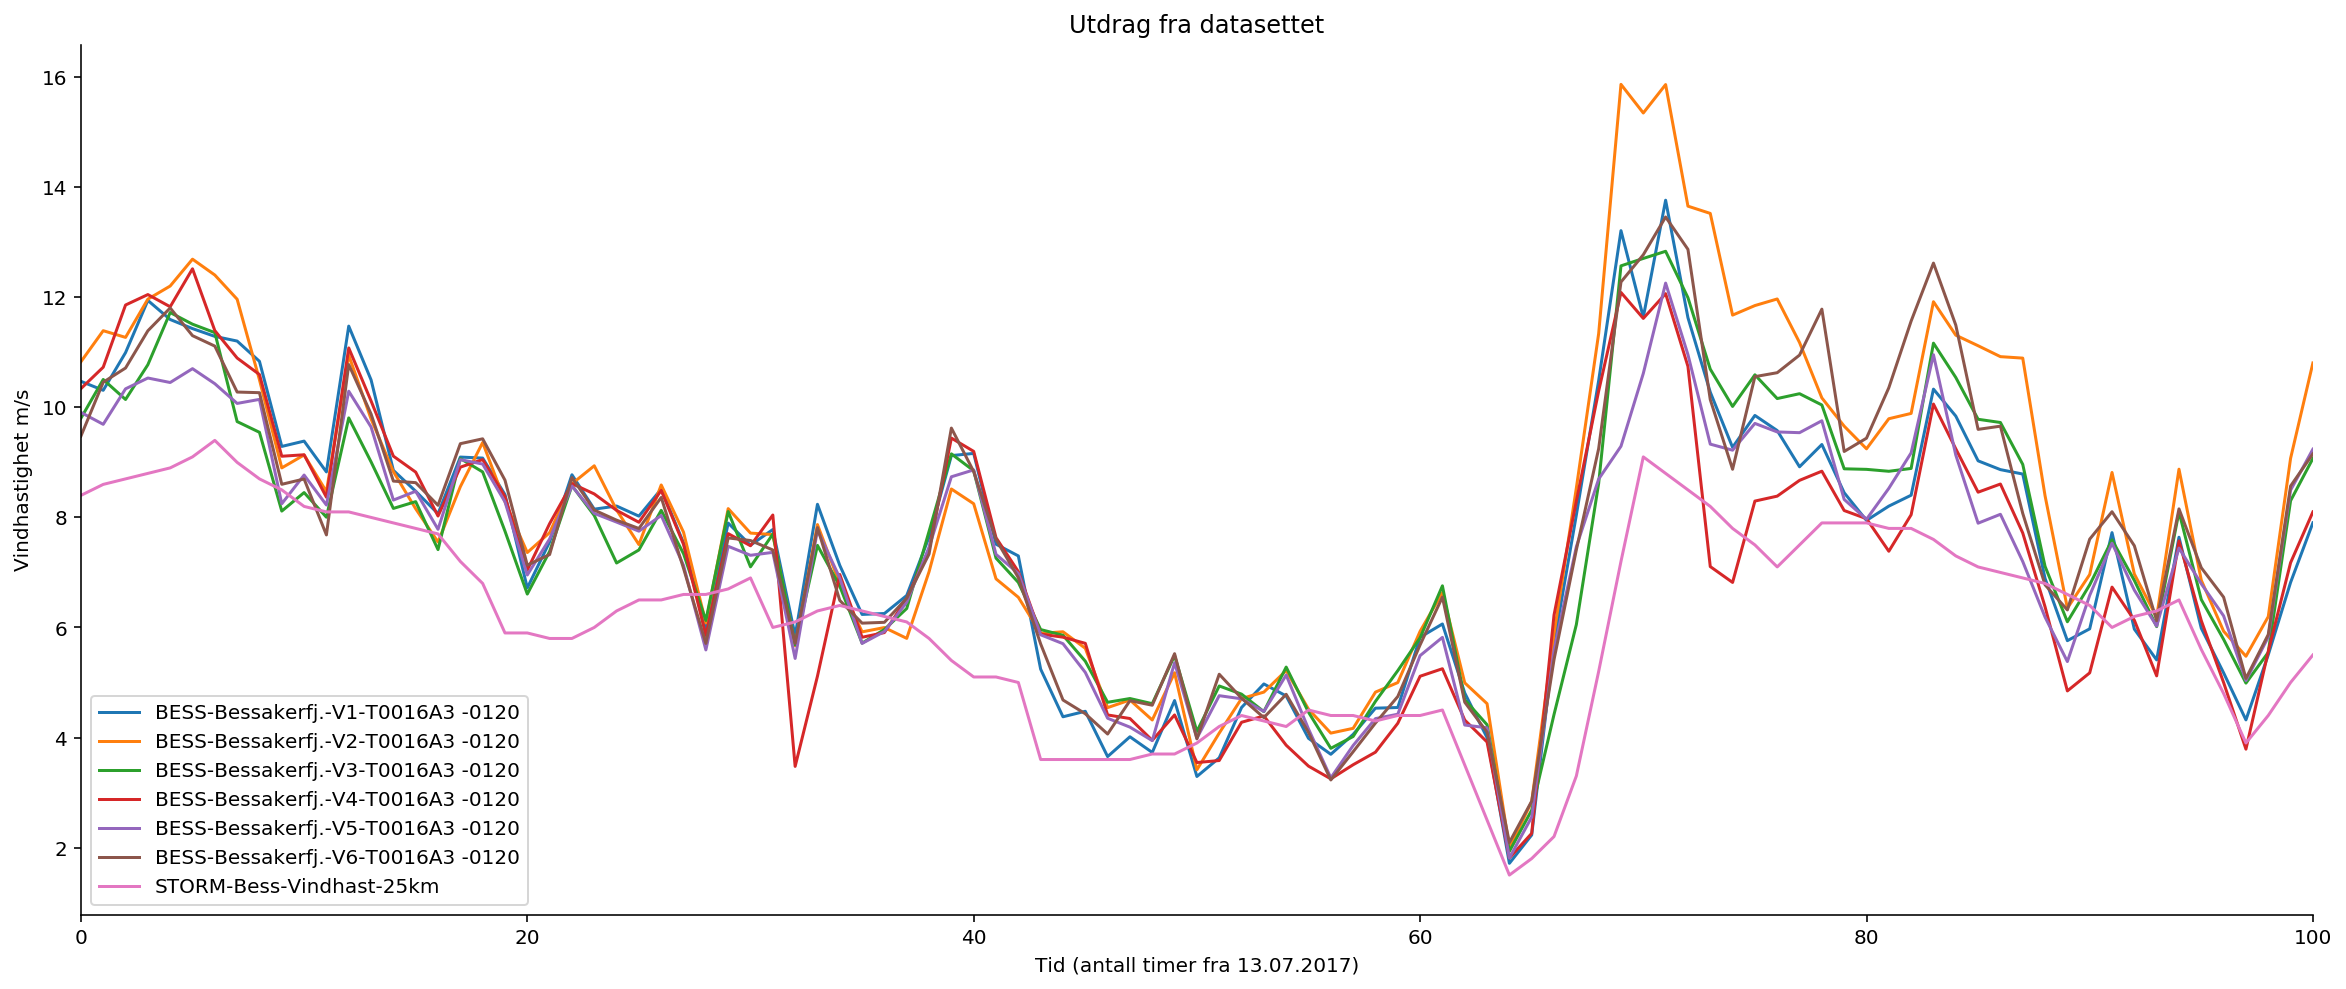

In [89]:
# Justere tidslinjen på plottet
start = 0
slutt = 100

ax = df_tek.loc[start:slutt,'BESS-Bessakerfj.-V1-T0016A3 -0120'].plot(figsize=(20,8))
ax = df_tek.loc[start:slutt,'BESS-Bessakerfj.-V2-T0016A3 -0120'].plot(figsize=(20,8))
ax = df_tek.loc[start:slutt,'BESS-Bessakerfj.-V3-T0016A3 -0120'].plot(figsize=(20,8))
ax = df_tek.loc[start:slutt,'BESS-Bessakerfj.-V4-T0016A3 -0120'].plot(figsize=(20,8))
ax = df_tek.loc[start:slutt,'BESS-Bessakerfj.-V5-T0016A3 -0120'].plot(figsize=(20,8))
ax = df_tek.loc[start:slutt,'BESS-Bessakerfj.-V6-T0016A3 -0120'].plot(figsize=(20,8))

ax = df_tek.loc[start:slutt,'STORM-Bess-Vindhast-25km'].plot(figsize=(20,8))



 
plt.xlabel('Tid (antall timer fra 13.07.2017)')
plt.ylabel('Vindhastighet m/s')
plt.title('Utdrag fra datasettet')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
fig.savefig('sammenligning naselle.png')

In [ ]:
BESS-Bessakerfj.-V1-T0016A3 -0120

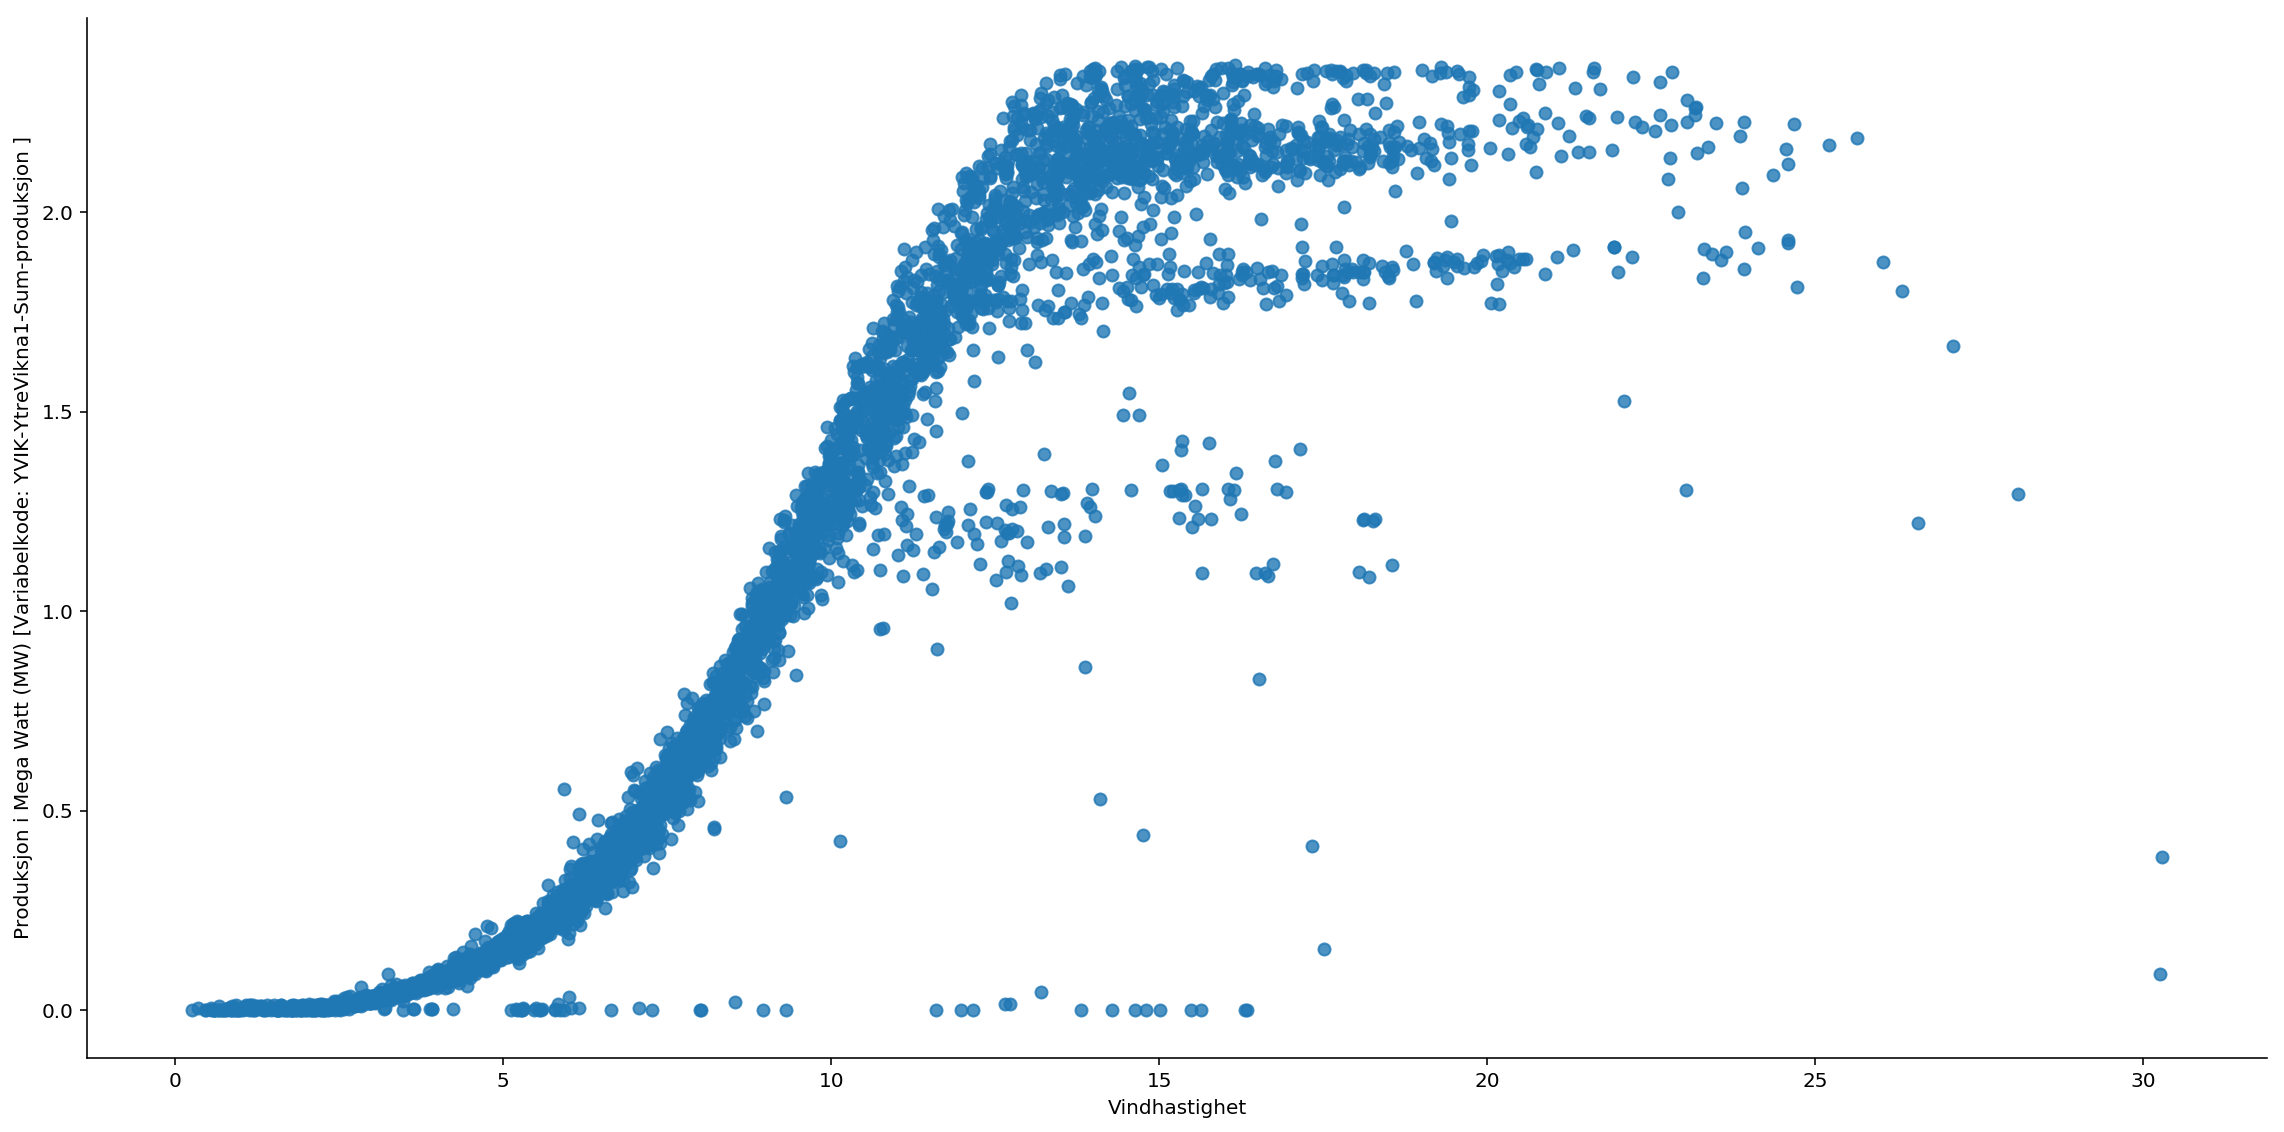

In [93]:
sns_plot = sns.lmplot(x='BESS-Bessakerfj.-V4-T0016A3 -0120',y='BESS-Bessakerfj.-G4-T4015A3 -0104',
           data=df_tek, aspect=2,size=8, fit_reg = False )
plt.xlabel('Vindhastighet')
plt.ylabel('Produksjon i Mega Watt (MW) [Variabelkode: YVIK-YtreVikna1-Sum-produksjon ]')
sns_plot.savefig("produksjon mot vindhastighet.png")

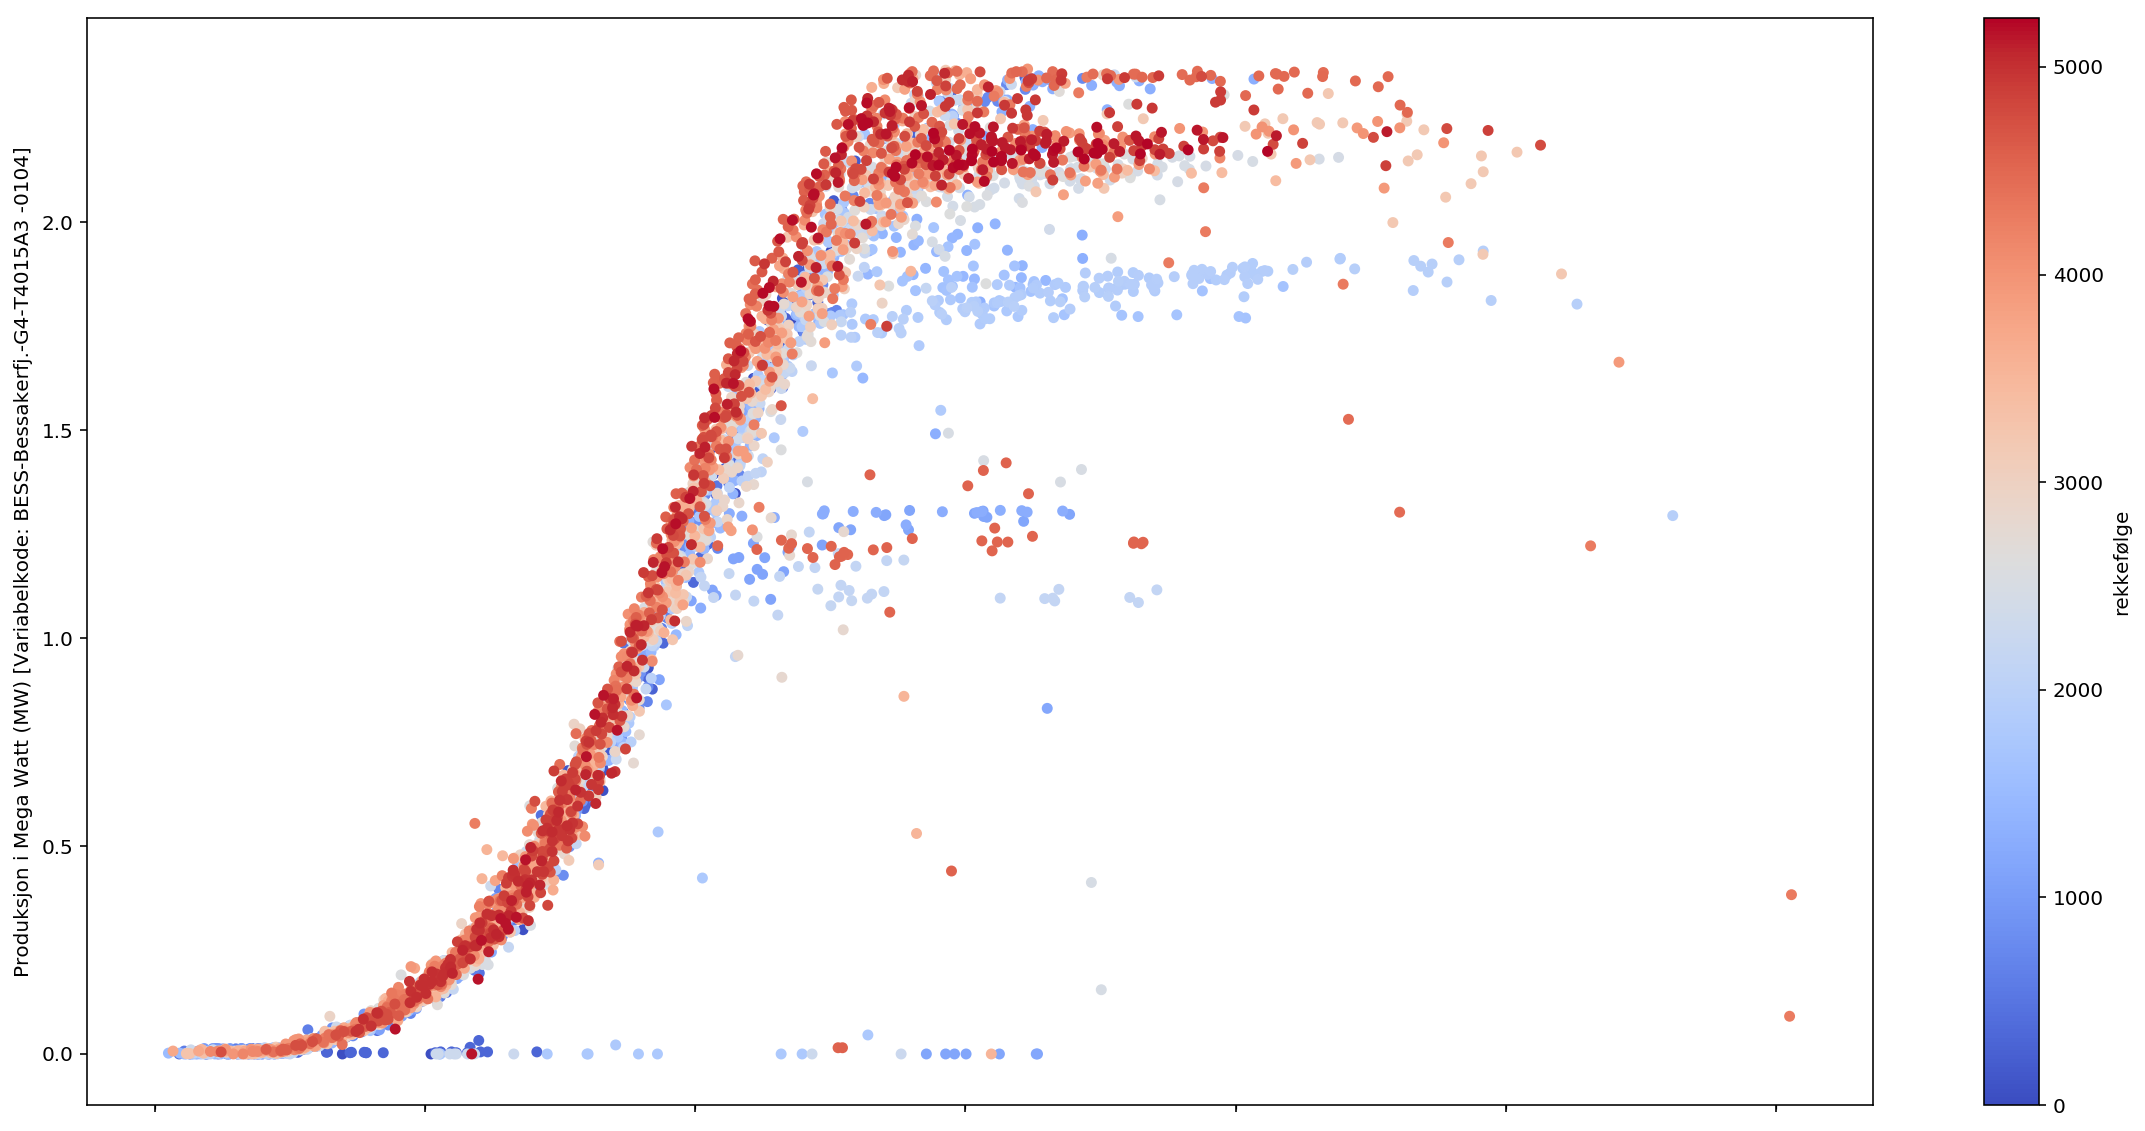

In [104]:
ax = df_tek.plot.scatter(x='BESS-Bessakerfj.-V4-T0016A3 -0120',y='BESS-Bessakerfj.-G4-T4015A3 -0104',
                   c='rekkefølge',cmap='coolwarm', figsize = (20,10))
plt.xlabel('Naselle vindhastighet(m/s) [Variabelkode: BESS-Bessakerfj.-V4-T0016A3 -0120]')
plt.ylabel('Produksjon i Mega Watt (MW) [Variabelkode: BESS-Bessakerfj.-G4-T4015A3 -0104]')

fig = ax.get_figure()
fig.savefig('produksjon og vindhastighet pluss vindretning.png')

In [100]:
df_tek['rekkefølge']=df_tek.index.values

In [101]:
df_tek['rekkefølge']

0          0
1          1
2          2
3          3
4          4
5          5
6          6
7          7
8          8
9          9
10        10
11        11
12        12
13        13
14        14
15        15
16        16
17        17
18        18
19        19
20        20
21        21
22        22
23        23
24        24
25        25
26        26
27        27
28        28
29        29
        ... 
5207    5207
5208    5208
5209    5209
5210    5210
5211    5211
5212    5212
5213    5213
5214    5214
5215    5215
5216    5216
5217    5217
5218    5218
5219    5219
5220    5220
5221    5221
5222    5222
5223    5223
5224    5224
5225    5225
5226    5226
5227    5227
5228    5228
5229    5229
5230    5230
5231    5231
5232    5232
5233    5233
5234    5234
5235    5235
5236    5236
Name: rekkefølge, Length: 5237, dtype: int64

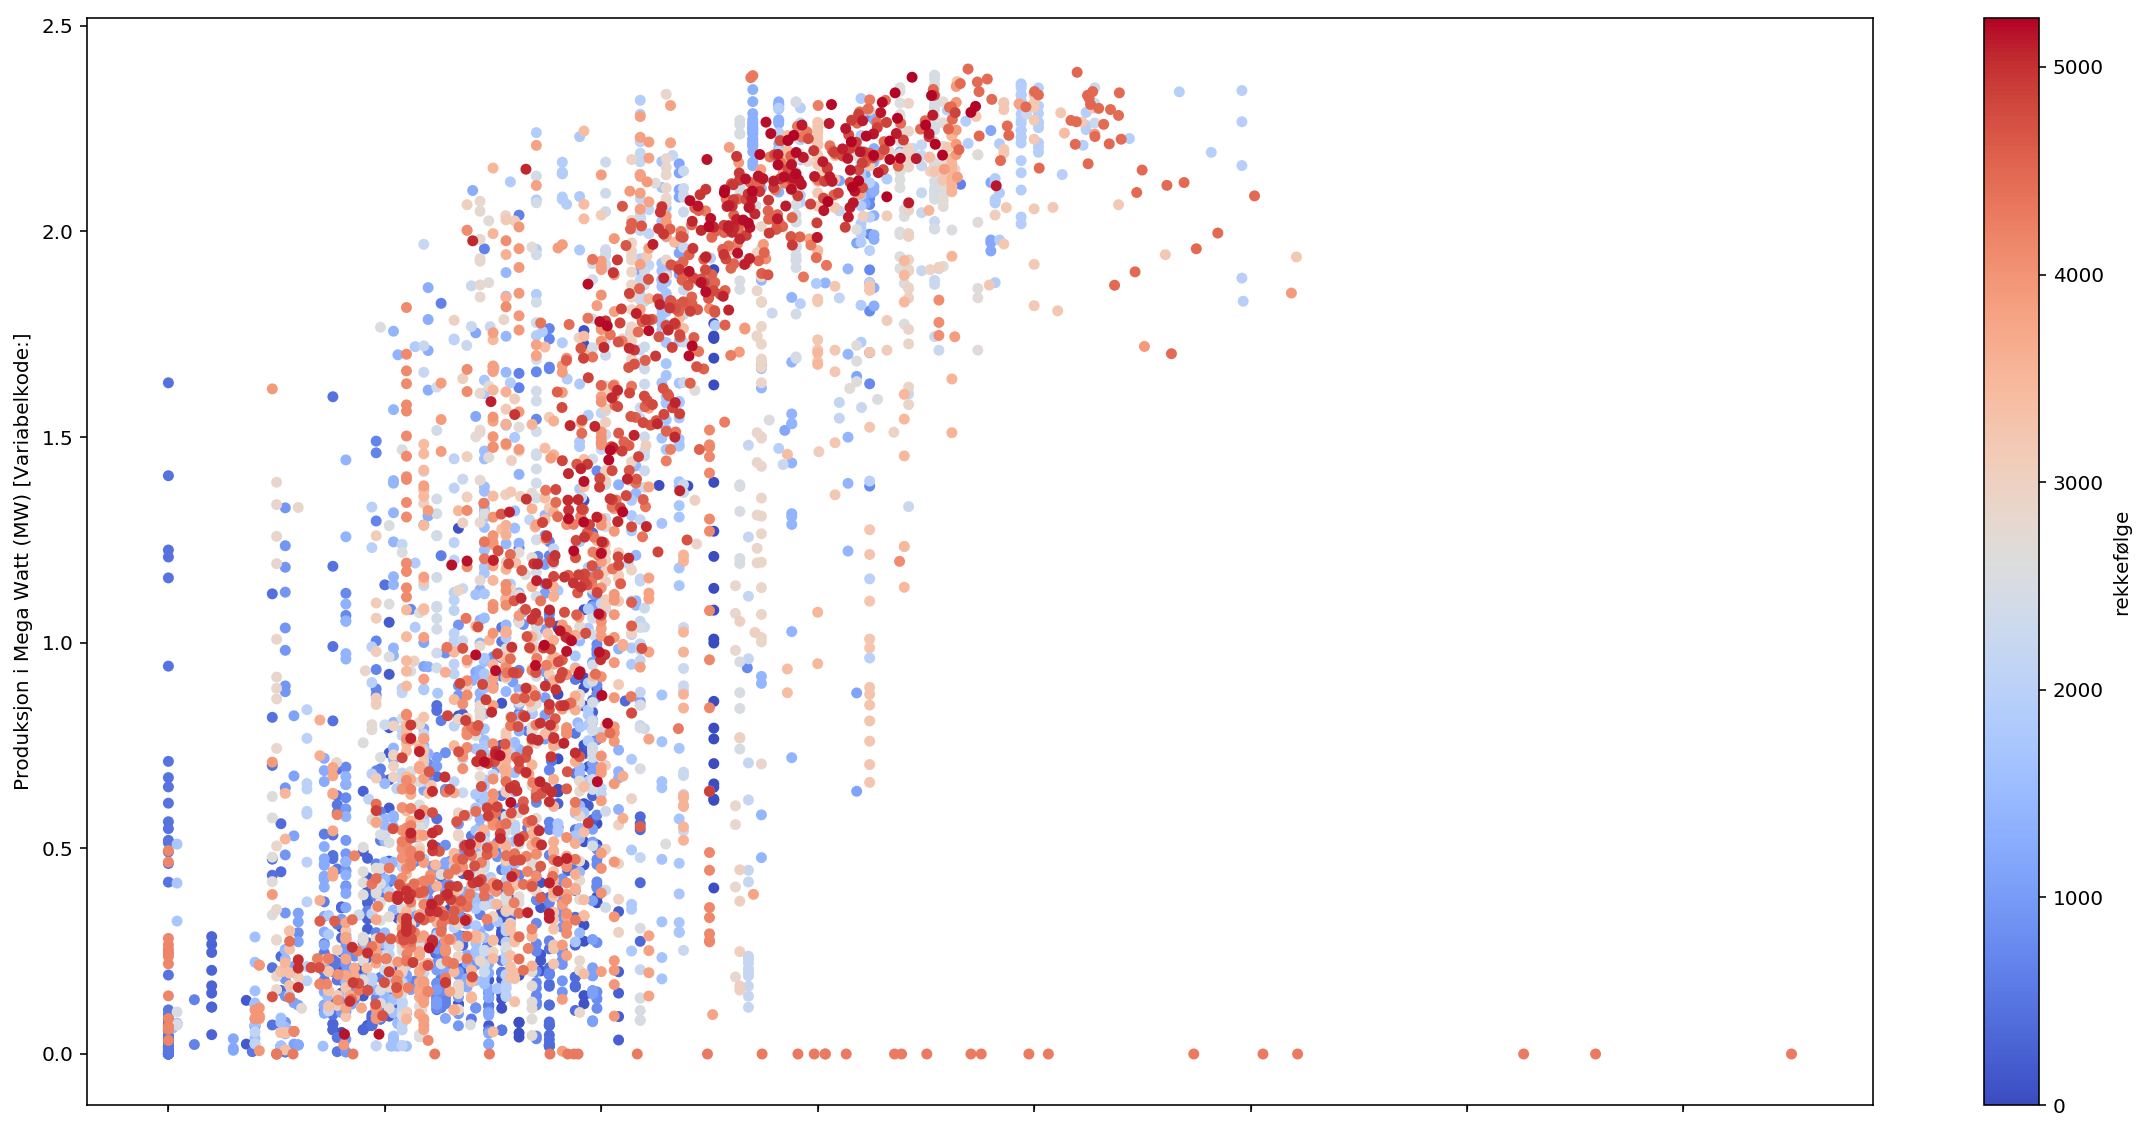

In [109]:
ax = df_tek.plot.scatter(x='YVIK-YtreVikna1..-V1-T0016A3 -0108',y='YVIK-YtreVikna1.-G1-T4015A3 -0104',
                   c='rekkefølge',cmap='coolwarm', figsize = (20,10))
plt.xlabel('Naselle vindhastighet(m/s) [Variabelkode:]')
plt.ylabel('Produksjon i Mega Watt (MW) [Variabelkode:]')

fig = ax.get_figure()
fig.savefig('produksjon og vindhastighet pluss vindretning.png')